In [44]:
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
# !pip install opencv-contrib-python
# !pip install --upgrade threadpoolctl

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

path_img = "Images/"
path_data = "data/cleaned.csv"
list_photos = [file for file in os.listdir(path_img)]
print(len(list_photos))

1050


In [46]:
articles = pd.read_csv(path_data)
articles.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [47]:
df_tmp = pd.DataFrame()
df_tmp["image_path"] = list_photos
df_tmp["id"] = df_tmp["image_path"].apply( lambda x : x[:-4] )
df_tmp.head()

,image_path,id
0,009099b1f6e1e8f893ec29a7023153c4.jpg,009099b1f6e1e8f893ec29a7023153c4
1,0096e89cc25a8b96fb9808716406fe94.jpg,0096e89cc25a8b96fb9808716406fe94
2,00cbbc837d340fa163d11e169fbdb952.jpg,00cbbc837d340fa163d11e169fbdb952
3,00d84a518e0550612fcfcba3b02b6255.jpg,00d84a518e0550612fcfcba3b02b6255
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,00e966a5049a262cfc72e6bbf68b80e7


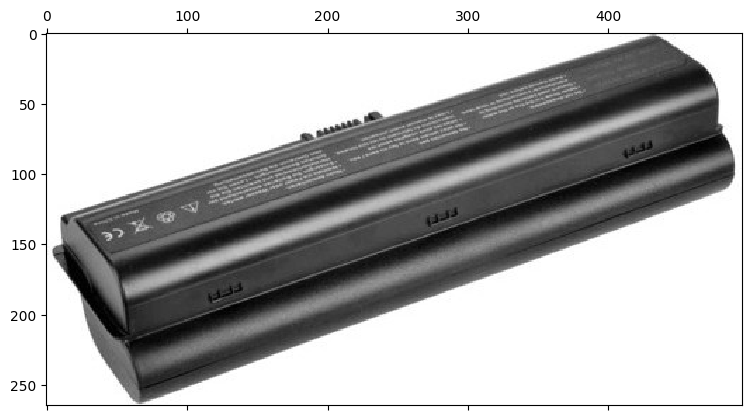

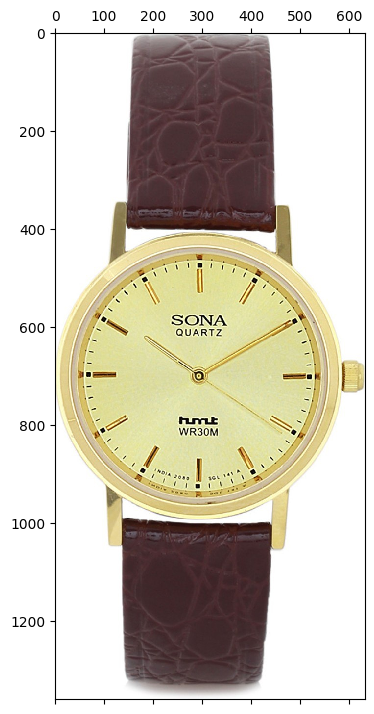

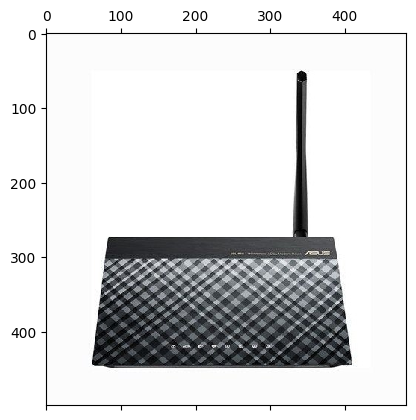

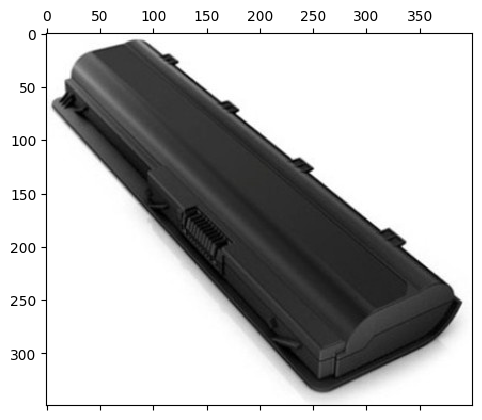

In [48]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from random import randint


for i in range(4):
    rdm = randint(0, len(list_photos))
    filename = path_img + df_tmp.image_path[rdm] 
    image = imread(filename)
    plt.matshow(image)
plt.show()

#### Fusion

In [49]:
df = df_tmp.merge(articles, how='inner', left_on='id', right_on='uniq_id')
print(len(articles))
print(len(df_tmp))
print(len(df))

1050
1050
1050


In [50]:
df.head()

,image_path,id,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,009099b1f6e1e8f893ec29a7023153c4.jpg,009099b1f6e1e8f893ec29a7023153c4,009099b1f6e1e8f893ec29a7023153c4,2016-04-24 18:34:50 +0000,http://www.flipkart.com/palito-plo-166-analog-...,"palito PLO 166 Analog Watch - For Girls, Women","[""Watches >> Wrist Watches >> palito Wrist Wat...",WATEHZPFAPQKUASQ,1500.0,199.0,"[""http://img5a.flixcart.com/image/watch/a/s/q/...",False,Specifications of palito PLO 166 Analog Watch ...,No rating available,No rating available,palito,"{""product_specification""=>[{""key""=>""Type"", ""va..."
1,0096e89cc25a8b96fb9808716406fe94.jpg,0096e89cc25a8b96fb9808716406fe94,0096e89cc25a8b96fb9808716406fe94,2016-06-17 14:13:36 +0000,http://www.flipkart.com/oxford-tawa-15-cm-diam...,oxford Tawa 15 cm cm diameter,"[""Kitchen & Dining >> Cookware >> Pots & Pans ...",PTPEJQR9VKFUV4HY,699.0,659.0,"[""http://img6a.flixcart.com/image/pot-pan/4/h/...",False,Key Features of oxford Tawa 15 cm cm diameter ...,No rating available,No rating available,oxford,"{""product_specification""=>[{""key""=>""Pan Type"",..."
2,00cbbc837d340fa163d11e169fbdb952.jpg,00cbbc837d340fa163d11e169fbdb952,00cbbc837d340fa163d11e169fbdb952,2016-01-01 19:37:22 +0000,http://www.flipkart.com/flazee-home-trends-bei...,Flazee Home Trends Beige 144.78 cm Table Runner,"[""Home Furnishing >> Kitchen & Dining Linen >>...",TBRE8GR3RSTQTXMJ,1299.0,399.0,"[""http://img6a.flixcart.com/image/table-runner...",False,Buy Flazee Home Trends Beige 144.78 cm Table R...,No rating available,No rating available,Flazee Home Trends,"{""product_specification""=>[{""key""=>""Shape"", ""v..."
3,00d84a518e0550612fcfcba3b02b6255.jpg,00d84a518e0550612fcfcba3b02b6255,00d84a518e0550612fcfcba3b02b6255,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-rose-soa...,Mxofere Combo Rose Soap And Aloevera Lemon Fac...,"[""Beauty and Personal Care >> Combos and Kits ...",CBKEBVA8PUFUPRW4,285.0,285.0,"[""http://img6a.flixcart.com/image/combo-kit/r/...",False,Buy Mxofere Combo Rose Soap And Aloevera Lemon...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty..."
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,00e966a5049a262cfc72e6bbf68b80e7,00e966a5049a262cfc72e6bbf68b80e7,2016-06-17 07:53:02 +0000,http://www.flipkart.com/ygs-keyboard-case-asus...,YGS Keyboard Case for Asus Memo Pad 7in Tab,"[""Computers >> Tablet Accessories >> Cases & C...",ACCEJGH6JVTM4CBH,1000.0,499.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Key Features of YGS Keyboard Case for Asus Mem...,No rating available,No rating available,YGS,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [51]:
import re

def create_category(tree, index : int):
    pattern = r"([\w\s&]+)(?= >>)"
    match = re.findall(pattern, tree)
    category = "unknown"
    if match:
        try : 
            category = match[index]
        except IndexError: 
            pass
    return category.lstrip() # remove the left space 

    

df["category_name"] = df["product_category_tree"].apply( lambda x : create_category(x,0) )
df

,image_path,id,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_name
0,009099b1f6e1e8f893ec29a7023153c4.jpg,009099b1f6e1e8f893ec29a7023153c4,009099b1f6e1e8f893ec29a7023153c4,2016-04-24 18:34:50 +0000,http://www.flipkart.com/palito-plo-166-analog-...,"palito PLO 166 Analog Watch - For Girls, Women","[""Watches >> Wrist Watches >> palito Wrist Wat...",WATEHZPFAPQKUASQ,1500.0,199.0,"[""http://img5a.flixcart.com/image/watch/a/s/q/...",False,Specifications of palito PLO 166 Analog Watch ...,No rating available,No rating available,palito,"{""product_specification""=>[{""key""=>""Type"", ""va...",Watches
1,0096e89cc25a8b96fb9808716406fe94.jpg,0096e89cc25a8b96fb9808716406fe94,0096e89cc25a8b96fb9808716406fe94,2016-06-17 14:13:36 +0000,http://www.flipkart.com/oxford-tawa-15-cm-diam...,oxford Tawa 15 cm cm diameter,"[""Kitchen & Dining >> Cookware >> Pots & Pans ...",PTPEJQR9VKFUV4HY,699.0,659.0,"[""http://img6a.flixcart.com/image/pot-pan/4/h/...",False,Key Features of oxford Tawa 15 cm cm diameter ...,No rating available,No rating available,oxford,"{""product_specification""=>[{""key""=>""Pan Type"",...",Kitchen & Dining
2,00cbbc837d340fa163d11e169fbdb952.jpg,00cbbc837d340fa163d11e169fbdb952,00cbbc837d340fa163d11e169fbdb952,2016-01-01 19:37:22 +0000,http://www.flipkart.com/flazee-home-trends-bei...,Flazee Home Trends Beige 144.78 cm Table Runner,"[""Home Furnishing >> Kitchen & Dining Linen >>...",TBRE8GR3RSTQTXMJ,1299.0,399.0,"[""http://img6a.flixcart.com/image/table-runner...",False,Buy Flazee Home Trends Beige 144.78 cm Table R...,No rating available,No rating available,Flazee Home Trends,"{""product_specification""=>[{""key""=>""Shape"", ""v...",Home Furnishing
3,00d84a518e0550612fcfcba3b02b6255.jpg,00d84a518e0550612fcfcba3b02b6255,00d84a518e0550612fcfcba3b02b6255,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-rose-soa...,Mxofere Combo Rose Soap And Aloevera Lemon Fac...,"[""Beauty and Personal Care >> Combos and Kits ...",CBKEBVA8PUFUPRW4,285.0,285.0,"[""http://img6a.flixcart.com/image/combo-kit/r/...",False,Buy Mxofere Combo Rose Soap And Aloevera Lemon...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty...",Beauty and Personal Care
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,00e966a5049a262cfc72e6bbf68b80e7,00e966a5049a262cfc72e6bbf68b80e7,2016-06-17 07:53:02 +0000,http://www.flipkart.com/ygs-keyboard-case-asus...,YGS Keyboard Case for Asus Memo Pad 7in Tab,"[""Computers >> Tablet Accessories >> Cases & C...",ACCEJGH6JVTM4CBH,1000.0,499.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Key Features of YGS Keyboard Case for Asus Mem...,No rating available,No rating available,YGS,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,feefbdff924dd6b7cc266449c9a36d69.jpg,feefbdff924dd6b7cc266449c9a36d69,feefbdff924dd6b7cc266449c9a36d69,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-red-flowers...,Rockmantra Red Flowers In Bucket Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",MUGEAGGKMUGXQ2YH,499.0,199.0,"[""http://img5a.flixcart.com/image/mug/2/y/h/1-...",False,Rockmantra Red Flowers In Bucket Ceramic Mug (...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining
1046,ff24511994fc459d04145231c8876d6c.jpg,ff24511994fc459d04145231c8876d6c,ff24511994fc459d04145231c8876d6c,2016-01-01 19:37:22 +0000,http://www.flipkart.com/home-originals-polka-a...,"Home Originals Polka, Abstract Double Blanket ...","[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEE2GJYAAQRHK8,2999.0,1299.0,"[""http://img5a.flixcart.com/image/blanket/h/k/...",False,"Buy Home Originals Polka, Abstract Double Blan...",No rating available,No ra

In [52]:
unique, counts = np.unique(df.category_name, return_counts=True)
total_cat = len(unique)

for index,cat in enumerate(unique):
    print(cat, ': ',counts[index])
print(f"Total : {total_cat}")

Baby Care :  150
Beauty and Personal Care :  150
Computers :  150
Home Decor & Festive Needs :  150
Home Furnishing :  150
Kitchen & Dining :  150
Watches :  150
Total : 7


In [53]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df["category"] = le.fit_transform(df["category_name"])
df

,image_path,id,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_name,category
0,009099b1f6e1e8f893ec29a7023153c4.jpg,009099b1f6e1e8f893ec29a7023153c4,009099b1f6e1e8f893ec29a7023153c4,2016-04-24 18:34:50 +0000,http://www.flipkart.com/palito-plo-166-analog-...,"palito PLO 166 Analog Watch - For Girls, Women","[""Watches >> Wrist Watches >> palito Wrist Wat...",WATEHZPFAPQKUASQ,1500.0,199.0,"[""http://img5a.flixcart.com/image/watch/a/s/q/...",False,Specifications of palito PLO 166 Analog Watch ...,No rating available,No rating available,palito,"{""product_specification""=>[{""key""=>""Type"", ""va...",Watches,6
1,0096e89cc25a8b96fb9808716406fe94.jpg,0096e89cc25a8b96fb9808716406fe94,0096e89cc25a8b96fb9808716406fe94,2016-06-17 14:13:36 +0000,http://www.flipkart.com/oxford-tawa-15-cm-diam...,oxford Tawa 15 cm cm diameter,"[""Kitchen & Dining >> Cookware >> Pots & Pans ...",PTPEJQR9VKFUV4HY,699.0,659.0,"[""http://img6a.flixcart.com/image/pot-pan/4/h/...",False,Key Features of oxford Tawa 15 cm cm diameter ...,No rating available,No rating available,oxford,"{""product_specification""=>[{""key""=>""Pan Type"",...",Kitchen & Dining,5
2,00cbbc837d340fa163d11e169fbdb952.jpg,00cbbc837d340fa163d11e169fbdb952,00cbbc837d340fa163d11e169fbdb952,2016-01-01 19:37:22 +0000,http://www.flipkart.com/flazee-home-trends-bei...,Flazee Home Trends Beige 144.78 cm Table Runner,"[""Home Furnishing >> Kitchen & Dining Linen >>...",TBRE8GR3RSTQTXMJ,1299.0,399.0,"[""http://img6a.flixcart.com/image/table-runner...",False,Buy Flazee Home Trends Beige 144.78 cm Table R...,No rating available,No rating available,Flazee Home Trends,"{""product_specification""=>[{""key""=>""Shape"", ""v...",Home Furnishing,4
3,00d84a518e0550612fcfcba3b02b6255.jpg,00d84a518e0550612fcfcba3b02b6255,00d84a518e0550612fcfcba3b02b6255,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-rose-soa...,Mxofere Combo Rose Soap And Aloevera Lemon Fac...,"[""Beauty and Personal Care >> Combos and Kits ...",CBKEBVA8PUFUPRW4,285.0,285.0,"[""http://img6a.flixcart.com/image/combo-kit/r/...",False,Buy Mxofere Combo Rose Soap And Aloevera Lemon...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty...",Beauty and Personal Care,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,00e966a5049a262cfc72e6bbf68b80e7,00e966a5049a262cfc72e6bbf68b80e7,2016-06-17 07:53:02 +0000,http://www.flipkart.com/ygs-keyboard-case-asus...,YGS Keyboard Case for Asus Memo Pad 7in Tab,"[""Computers >> Tablet Accessories >> Cases & C...",ACCEJGH6JVTM4CBH,1000.0,499.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Key Features of YGS Keyboard Case for Asus Mem...,No rating available,No rating available,YGS,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,feefbdff924dd6b7cc266449c9a36d69.jpg,feefbdff924dd6b7cc266449c9a36d69,feefbdff924dd6b7cc266449c9a36d69,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-red-flowers...,Rockmantra Red Flowers In Bucket Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",MUGEAGGKMUGXQ2YH,499.0,199.0,"[""http://img5a.flixcart.com/image/mug/2/y/h/1-...",False,Rockmantra Red Flowers In Bucket Ceramic Mug (...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,5
1046,ff24511994fc459d04145231c8876d6c.jpg,ff24511994fc459d04145231c8876d6c,ff24511994fc459d04145231c8876d6c,2016-01-01 19:37:22 +0000,http://www.flipkart.com/home-originals-polka-a...,"Home Originals Polka, Abstract Double Blanket ...","[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEE2GJYAAQRHK8,2999.0,1299.0,"[""http://img5a.flixcart.com/image/blanket/h/k/...",False,"Buy Home Originals Polka, Abstract Double Blan...",

In [54]:
import cv2
import time

def get_descriptors(list_photos, method):
    start=time.perf_counter()
    descriptors_list = []
    df = pd.DataFrame()

    if method == 'SIFT' :
        image_extractor = cv2.ORB_create(500)
    elif method == 'ORB' :
        image_extractor = cv2.ORB_create(500)

    for image_num in range(len(list_photos)) :
        if image_num%50 == 0 : 
            print(image_num)
        image = cv2.imread(path_img+list_photos[image_num],0) # convert in gray
        # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        res = cv2.equalizeHist(image)   # equalize image histogram
        kp, des = image_extractor.detectAndCompute(res, None)
        descriptors_list.append(des)
        
    for des in descriptors_list :
        df_tmp = pd.DataFrame(des)
        df = pd.concat([df, df_tmp], axis=0)
    
    df = df.reset_index(drop=True)
    df        
    stop=time.perf_counter()
    print(f"{len(df)} descripteurs créés pour {len(list_photos)} images.\nTemps : {round((stop - start),3)}s")
    return df, descriptors_list

<p style='font-size:1.4em'>⏰<i>  L'opération ci-dessous peut durer longtemps ! Sauter la case suivante, pour charger directement les données</i></p>

In [65]:
df_descriptors_sift, array_descriptors_sift = get_descriptors(list_photos, 'SIFT')
df_descriptors_orb, array_descriptors_orb = get_descriptors(list_photos, 'ORB')
df_descriptors_sift.to_csv('data/descriptors-sift.csv', index=False)
df_descriptors_orb.to_csv('data/descriptors-orb.csv', index=False)
df_descriptors_sift

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
520145 descripteurs créés pour 1050 images.
Temps : 131.013s
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
520145 descripteurs créés pour 1050 images.
Temps : 122.047s


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,162,161,111,96,118,131,218,100,13,33,...,21,95,25,28,168,208,85,130,98,169
1,163,177,96,90,127,221,153,93,27,69,...,254,215,14,93,24,255,95,142,222,223
2,70,50,173,176,234,96,57,68,172,213,...,162,64,220,3,254,233,132,37,181,115
3,25,48,156,169,124,143,241,89,118,233,...,223,16,196,205,35,32,109,138,91,131
4,24,26,174,124,1,214,113,19,36,14,...,97,14,211,231,226,129,99,36,100,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520140,212,72,95,229,38,2,111,48,164,138,...,33,44,240,235,227,144,36,179,33,33
520141,122,32,20,237,125,15,232,91,175,169,...,195,204,151,217,179,180,64,8,83,136
520142,252,188,190,126,253,237,87,222,251,59,...,250,51,251,255,117,60,194,241,194,43
520143,35,164,224,201,220,139,236,207,95,113,...,79,211,30,28,159,236,213,12,240,196


In [66]:
from sklearn import cluster, metrics

def launch_clustering(df):
    start=time.perf_counter()
    
    # Determination number of clusters    
    k = int(round(np.sqrt(len(df)),0))
    print("Nombre de clusters estimés : ", k)
    print("Création de",k, "clusters de descripteurs ...")

    # Clustering
    kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
    kmeans.fit(df)

    duration1=time.perf_counter()-start
    print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")
    return kmeans

# UTILISATION DES FEATURES OBTENUS PAR SIFT

In [77]:
df_descriptors_sift = pd.read_csv('data/descriptors-sift.csv')
df_descriptors_sift
kmeans = launch_clustering(df_descriptors_sift)

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :            18.31 secondes


In [78]:
kmeans

MiniBatchKMeans(init_size=2163, n_clusters=721, random_state=0)

In [79]:
# Creation of histograms (features)
temps1=time.perf_counter()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(array_descriptors_sift) :
    if i%50 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.perf_counter()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

1050
1050
0


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

50


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

100


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

150


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

200
250


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

300


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

350
400


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

450
500


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

550
600


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

650


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

700


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

750
800


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

850
900


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

950
1000
temps de création histogrammes :             4.50 secondes


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

In [80]:
im_features[0]

array([0.   , 0.   , 0.004, 0.   , 0.004, 0.   , 0.002, 0.   , 0.   ,
       0.   , 0.   , 0.002, 0.   , 0.   , 0.002, 0.   , 0.004, 0.   ,
       0.   , 0.006, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.004, 0.002, 0.   , 0.006, 0.   , 0.   ,
       0.002, 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.002,
       0.002, 0.   , 0.002, 0.004, 0.   , 0.   , 0.   , 0.002, 0.008,
       0.004, 0.002, 0.   , 0.   , 0.   , 0.   , 0.002, 0.002, 0.   ,
       0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.002, 0.002, 0.018, 0.004, 0.   , 0.   , 0.01 , 0.   ,
       0.   , 0.002, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002,
       0.006, 0.006, 0.   , 0.   , 0.   , 0.   , 0.002, 0.01 , 0.   ,
       0.   , 0.   , 0.004, 0.002, 0.002, 0.   , 0.   , 0.004, 0.006,
       0.004, 0.   , 0.   , 0.018, 0.002, 0.   , 0.   , 0.   , 0.01 ,
       0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
       0.004, 0.002,

### Réduction de dimension PCA et T-SNE


In [81]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 721)
Dimensions dataset après réduction PCA :  (1050, 579)


In [82]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
# df_tsne["class"] = data["label_name"]
print(df_tsne.shape)
df_tsne

(1050, 2)


,tsne1,tsne2
0,-4.374448,15.424652
1,38.458279,-4.653407
2,-15.474613,4.577898
3,19.772509,-9.997612
4,1.053226,-4.735626
...,...,...
1045,34.169327,6.043258
1046,-8.720337,14.146280
1047,5.259562,0.666743
1048,-3.535271,10.265200


## Analyse visuelle : affichage T-SNE selon catégories d'images

In [83]:
from sklearn import cluster, metrics
# X_tsne = feat_pca
cls = cluster.KMeans(n_clusters=total_cat)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)
df_tsne

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(1050, 3)


,tsne1,tsne2,cluster
0,-4.374448,15.424652,3
1,38.458279,-4.653407,0
2,-15.474613,4.577898,6
3,19.772509,-9.997612,4
4,1.053226,-4.735626,1
...,...,...,...
1045,34.169327,6.043258,0
1046,-8.720337,14.146280,3
1047,5.259562,0.666743,1
1048,-3.535271,10.265200,3


In [84]:
merged_df = df.merge(df_tsne, left_index=True, right_index=True)
merged_df[["image_path","category_name","category","cluster"]].head(50)

,image_path,category_name,category,cluster
0,009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,6,3
1,0096e89cc25a8b96fb9808716406fe94.jpg,Kitchen & Dining,5,0
2,00cbbc837d340fa163d11e169fbdb952.jpg,Home Furnishing,4,6
3,00d84a518e0550612fcfcba3b02b6255.jpg,Beauty and Personal Care,1,4
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,Computers,2,1
5,00ed03657cedbe4663eff2d7fa702a33.jpg,Computers,2,4
6,01089dc3618a0ab7304d784ef400b83d.jpg,Computers,2,0
7,0131e5d87b72877702d536299cf83b75.jpg,Kitchen & Dining,5,4
8,020d2daba55a723128e4e07c0b0393a9.jpg,Beauty and Personal Care,1,3
9,02127f52e96fb72c66bf081d25104ef8.jpg,Kitchen & Dining,5,6


In [85]:
true_labels = merged_df["category"]
new_labels = merged_df["cluster"]
print("ARI : ", metrics.adjusted_rand_score( true_labels, new_labels))

ARI :  0.032051276569467636


In [86]:
conf_mat = metrics.confusion_matrix(true_labels, new_labels)
print(conf_mat)

[[30 11 24 15 17 27 26]
 [19 11 42 39 11  7 21]
 [46 12 13 10 47  9 13]
 [49 27 14 21 12 11 16]
 [22 13 16 25  9 18 47]
 [55 21 16 12 18 12 16]
 [19 26 24 25 12 26 18]]


In [87]:
def conf_mat_transform(y_true,y_pred, corresp) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x])     
    return labels['y_pred_transform']


corresp = [0, 1, 2, 3, 5, 6, 4]
cls_labels_transform = conf_mat_transform(true_labels, new_labels, corresp)
conf_mat = metrics.confusion_matrix(true_labels, new_labels)
print(conf_mat)
print()
print(metrics.classification_report(true_labels, new_labels))

Correspondance des clusters :  [0, 1, 2, 3, 5, 6, 4]
[[30 11 24 15 17 27 26]
 [19 11 42 39 11  7 21]
 [46 12 13 10 47  9 13]
 [49 27 14 21 12 11 16]
 [22 13 16 25  9 18 47]
 [55 21 16 12 18 12 16]
 [19 26 24 25 12 26 18]]

              precision    recall  f1-score   support

           0       0.12      0.20      0.15       150
           1       0.09      0.07      0.08       150
           2       0.09      0.09      0.09       150
           3       0.14      0.14      0.14       150
           4       0.07      0.06      0.07       150
           5       0.11      0.08      0.09       150
           6       0.11      0.12      0.12       150

    accuracy                           0.11      1050
   macro avg       0.11      0.11      0.11      1050
weighted avg       0.11      0.11      0.11      1050



<Axes: >

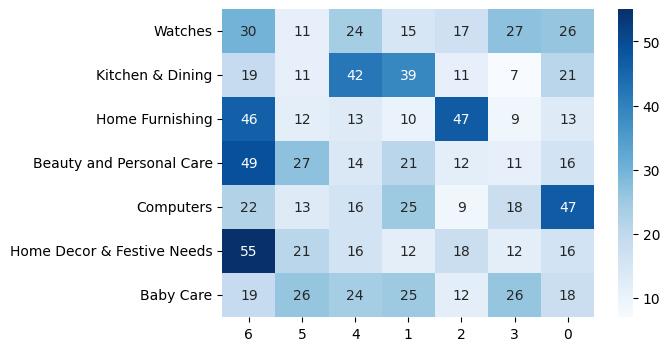

In [91]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in df.category_name.unique()],
                  columns = [col_name for col_name in df.category.unique()])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# UTILISATION DES FEATURES OBTENUS PAR ORB
Même code que SIFT, et même résultats...

In [92]:
df_descriptors_orb = pd.read_csv('data/descriptors-orb.csv')
kmeans = launch_clustering(df_descriptors_orb)

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :            18.97 secondes


In [93]:
# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(array_descriptors_sift) :
    if i%50 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.perf_counter()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

50


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

100


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

150
200


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

250
300


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

350
400


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

450


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

500
550


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

600


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

650
700


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

750


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

800
850


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

900
950


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

1000
temps de création histogrammes :           280.32 secondes


C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(
C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature

In [94]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 721)
Dimensions dataset après réduction PCA :  (1050, 579)


In [102]:
tsne = manifold.TSNE(n_components=2)
X_tsne = tsne.fit_transform(feat_pca)
df_tsne["cluster"] = cls.labels_
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
cls = cluster.KMeans(n_clusters=total_cat)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)
df_tsne

C:\Users\utilisateur\dev\briefs\Brief26-pretraitement\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(1050, 3)


,tsne1,tsne2,cluster
0,-6.983328,-18.032854,0
1,37.637238,4.766103,5
2,-15.857439,-2.414182,4
3,22.376646,-10.691216,6
4,2.243086,2.846733,3
...,...,...,...
1045,38.223885,-5.178225,5
1046,-12.041761,-12.740139,4
1047,6.962655,-3.747292,0
1048,-3.508363,-11.898688,0


In [103]:
merged_df = df.merge(df_tsne, left_index=True, right_index=True)
true_labels = merged_df["category"]
new_labels = merged_df["cluster"]
print("ARI : ", metrics.adjusted_rand_score( true_labels, new_labels))

ARI :  0.03561641358884117


Correspondance des clusters :  [0, 1, 2, 3, 5, 6, 4]
[[ 9 37 20 30 27 14 13]
 [33 48  6 13 26 11 13]
 [13 17 53 15 10 21 21]
 [25 17  5 20 26 17 40]
 [13 28 14 29 50  9  7]
 [18 21 16 22 11 39 23]
 [31 31 12 29 19 14 14]]

              precision    recall  f1-score   support

           0       0.06      0.06      0.06       150
           1       0.24      0.32      0.28       150
           2       0.42      0.35      0.38       150
           3       0.13      0.13      0.13       150
           4       0.30      0.33      0.31       150
           5       0.31      0.26      0.28       150
           6       0.11      0.09      0.10       150

    accuracy                           0.22      1050
   macro avg       0.22      0.22      0.22      1050
weighted avg       0.22      0.22      0.22      1050



<Axes: >

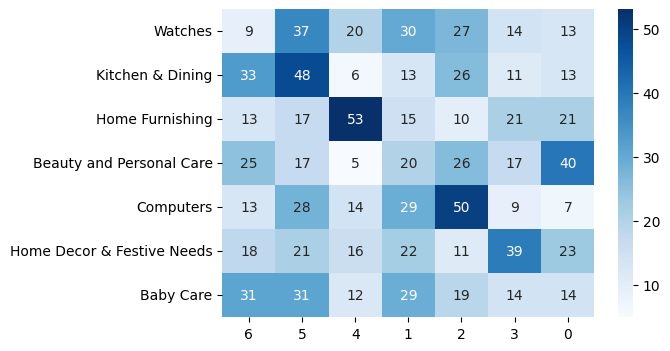

In [105]:
conf_mat = metrics.confusion_matrix(true_labels, new_labels)
corresp = [0, 1, 2, 3, 5, 6, 4]
cls_labels_transform = conf_mat_transform(true_labels, new_labels, corresp)
conf_mat = metrics.confusion_matrix(true_labels, new_labels)
print(conf_mat)
print()
print(metrics.classification_report(true_labels, new_labels))
df_cm = pd.DataFrame(conf_mat, index = [label for label in df.category_name.unique()],
                  columns = [col_name for col_name in df.category.unique()])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")